In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "internlm2_5-7b-chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   text                                                           3000 non-null   object
 1   label                                                          3000 non-null   object
 2   title                                                          3000 non-null   object
 3   puzzle                                                         3000 non-null   object
 4   truth                                                          3000 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-35_torch.bfloat16_lf   3000 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-70_torch.bfloat16_lf   3000 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-105_torch.bfloat16_lf  3000 n

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'internlm/internlm2_5-7b-chat/checkpoint-35_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat/checkpoint-70_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat/checkpoint-105_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat/checkpoint-140_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat/checkpoint-175_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat/checkpoint-210_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat/checkpoint-245_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat/checkpoint-280_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat/checkpoint-315_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat/checkpoint-350_torch.bfloat16_lf']

In [9]:
perf_df = get_metrics_df(df)
perf_df

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:439: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                model  \
0    0.0  internlm2_5-7b-chat   
1    0.2  internlm2_5-7b-chat   
2    0.4  internlm2_5-7b-chat   
3    0.6  internlm2_5-7b-chat   
4    0.8  internlm2_5-7b-chat   
5    1.0  internlm2_5-7b-chat   
6    1.2  internlm2_5-7b-chat   
7    1.4  internlm2_5-7b-chat   
8    1.6  internlm2_5-7b-chat   
9    1.8  internlm2_5-7b-chat   

                                                 run  accuracy  precision  \
0  internlm/internlm2_5-7b-chat/checkpoint-35_tor...  0.719333   0.786349   
1  internlm/internlm2_5-7b-chat/checkpoint-70_tor...  0.726000   0.790025   
2  internlm/internlm2_5-7b-chat/checkpoint-105_to...  0.673667   0.804457   
3  internlm/internlm2_5-7b-chat/checkpoint-140_to...  0.749667   0.804187   
4  internlm/internlm2_5-7b-chat/checkpoint-175_to...  0.726000   0.809463   
5  internlm/internlm2_5-7b-chat/checkpoint-210_to...  0.727667   0.803967   
6  internlm/internlm2_5-7b-chat/checkpoint-245_to...  0.747000   0.805554   
7  internlm/internlm2_5-7b-chat/checkpoint-280_to...  0.716667   0.805954   
8  internlm/internlm2_5-7b-chat/checkpoint-315_to...  0.698333   0.811911   
9  internlm/internlm2_5-7b-chat/checkpoint-350_to...  0.707667   0.812013   

     recall        f1  ratio_valid_classifications  
0  0.719333  0.733050                          1.0  
1  0.726000  0.739658                          1.0  
2  0.673667  0.710412                          1.0  
3  0.749667  0.766016                          1.0  
4  0.726000  0.751395                          1.0  
5  0.727667  0.748865                          1.0  
6  0.747000  0.765274                          1.0  
7  0.716667  0.743243                          1.0  
8  0.698333  0.734725                          1.0  
9  0.707667  0.740815                          1.0

0.0: internlm/internlm2_5-7b-chat/checkpoint-35_torch.bfloat16_lf
0.2: internlm/internlm2_5-7b-chat/checkpoint-70_torch.bfloat16_lf
0.4: internlm/internlm2_5-7b-chat/checkpoint-105_torch.bfloat16_lf
0.6: internlm/internlm2_5-7b-chat/checkpoint-140_torch.bfloat16_lf
0.8: internlm/internlm2_5-7b-chat/checkpoint-175_torch.bfloat16_lf
1.0: internlm/internlm2_5-7b-chat/checkpoint-210_torch.bfloat16_lf
1.2: internlm/internlm2_5-7b-chat/checkpoint-245_torch.bfloat16_lf
1.4: internlm/internlm2_5-7b-chat/checkpoint-280_torch.bfloat16_lf
1.6: internlm/internlm2_5-7b-chat/checkpoint-315_torch.bfloat16_lf
1.8: internlm/internlm2_5-7b-chat/checkpoint-350_torch.bfloat16_lf


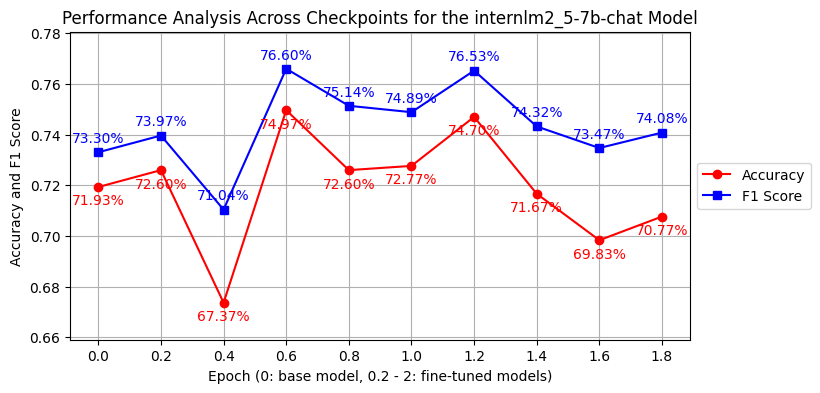

In [10]:
plot_metrics(perf_df, model_name)

In [11]:
perf_df.to_csv(metrics_csv, index=False)

********** internlm/internlm2_5-7b-chat/checkpoint-35_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-35_torch.bfloat16_lf
是       1483
不是      1069
不重要      409
回答正确      30
问法错误       9
Name: count, dtype: int64


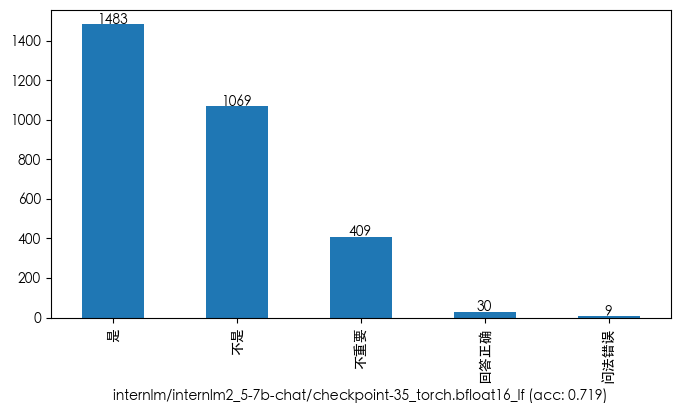

********** internlm/internlm2_5-7b-chat/checkpoint-70_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-70_torch.bfloat16_lf
是       1458
不是      1108
不重要      404
回答正确      22
问法错误       8
Name: count, dtype: int64


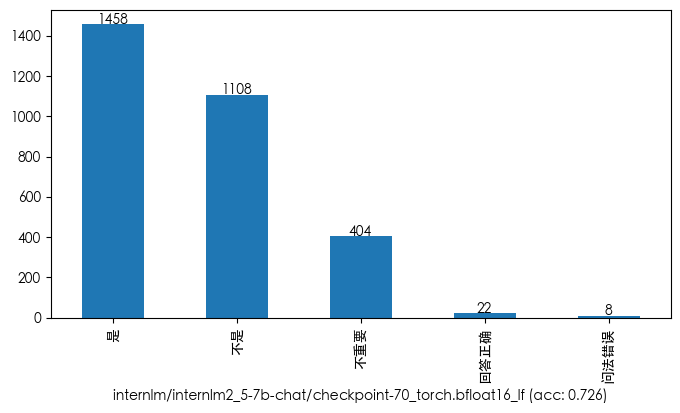

********** internlm/internlm2_5-7b-chat/checkpoint-105_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-105_torch.bfloat16_lf
是       1297
不是       974
不重要      694
回答正确      29
问法错误       6
Name: count, dtype: int64


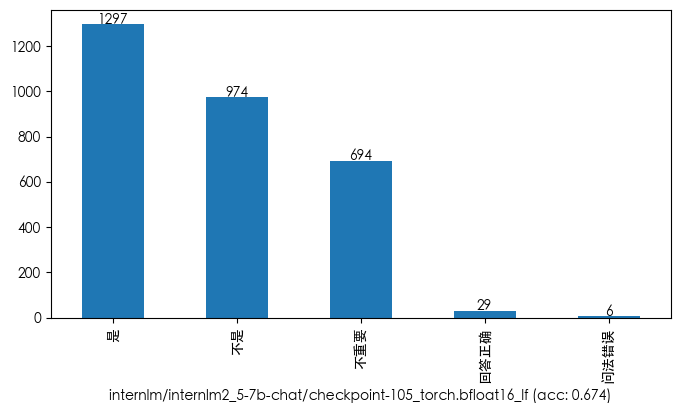

********** internlm/internlm2_5-7b-chat/checkpoint-140_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-140_torch.bfloat16_lf
是       1371
不是      1182
不重要      333
问法错误      81
回答正确      33
Name: count, dtype: int64


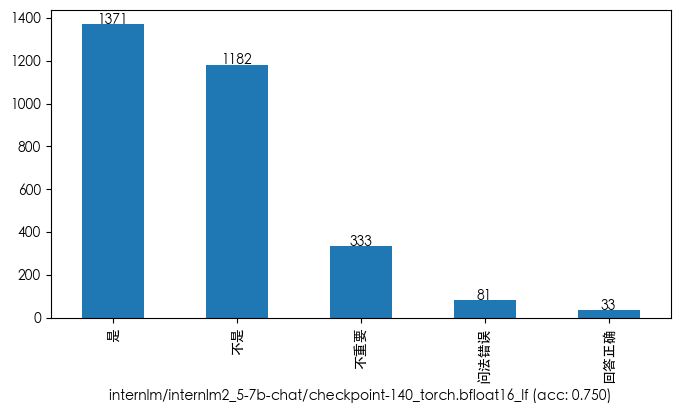

********** internlm/internlm2_5-7b-chat/checkpoint-175_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-175_torch.bfloat16_lf
是       1325
不是      1110
不重要      486
问法错误      47
回答正确      32
Name: count, dtype: int64


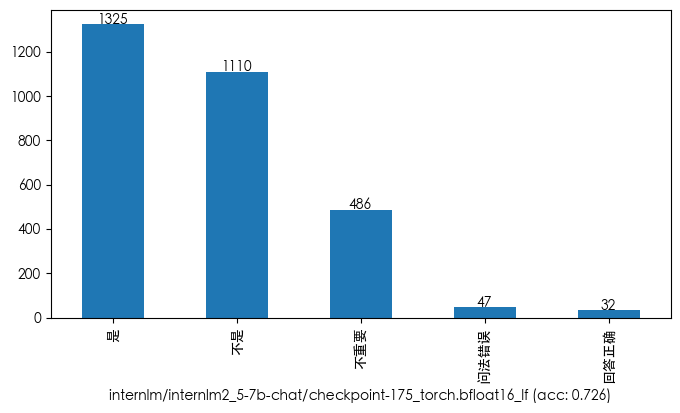

********** internlm/internlm2_5-7b-chat/checkpoint-210_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-210_torch.bfloat16_lf
是       1394
不是      1089
不重要      416
问法错误      70
回答正确      31
Name: count, dtype: int64


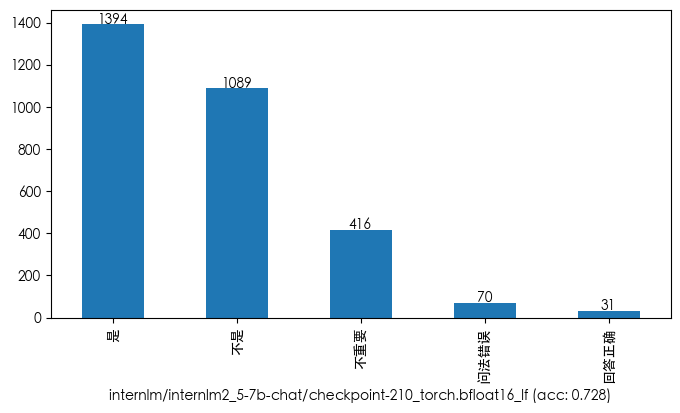

********** internlm/internlm2_5-7b-chat/checkpoint-245_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-245_torch.bfloat16_lf
是       1344
不是      1196
不重要      381
问法错误      55
回答正确      24
Name: count, dtype: int64


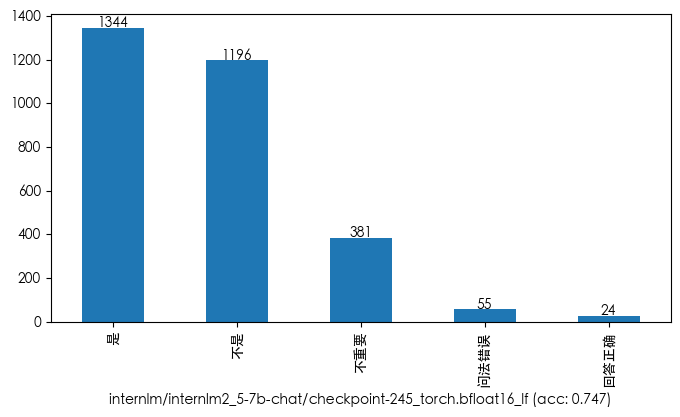

********** internlm/internlm2_5-7b-chat/checkpoint-280_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-280_torch.bfloat16_lf
是       1341
不是      1081
不重要      491
问法错误      61
回答正确      26
Name: count, dtype: int64


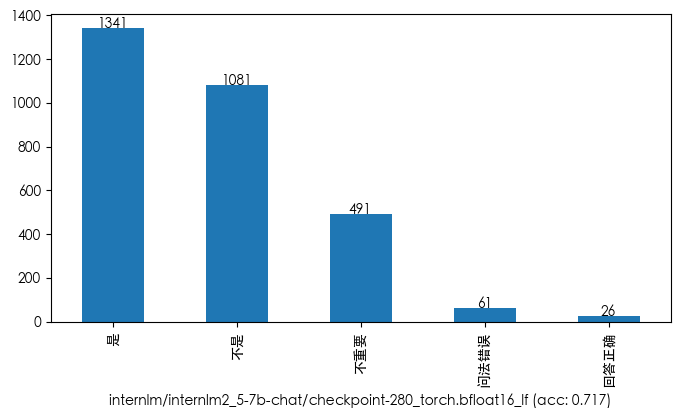

********** internlm/internlm2_5-7b-chat/checkpoint-315_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-315_torch.bfloat16_lf
是       1263
不是      1057
不重要      604
问法错误      49
回答正确      27
Name: count, dtype: int64


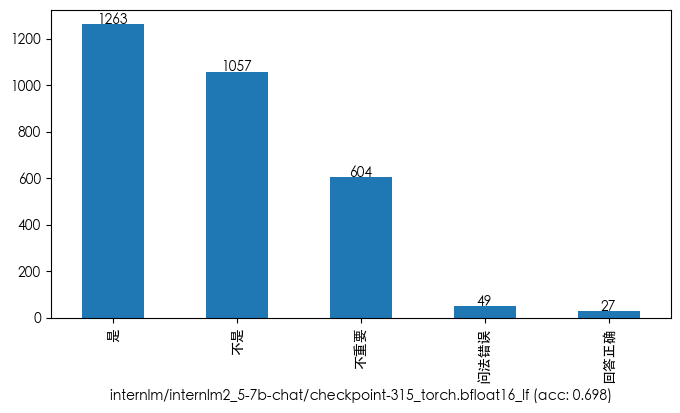

********** internlm/internlm2_5-7b-chat/checkpoint-350_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-350_torch.bfloat16_lf
是       1282
不是      1075
不重要      569
问法错误      47
回答正确      27
Name: count, dtype: int64


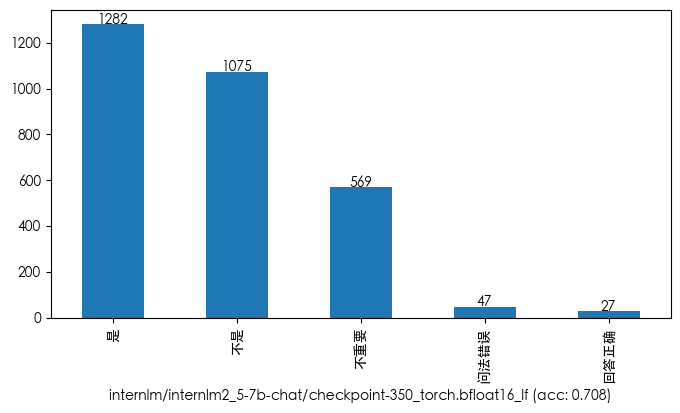

In [12]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** internlm/internlm2_5-7b-chat/checkpoint-35_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-35_torch.bfloat16_lf
是       1483
不是      1069
不重要      409
回答正确      30
问法错误       9
Name: count, dtype: int64


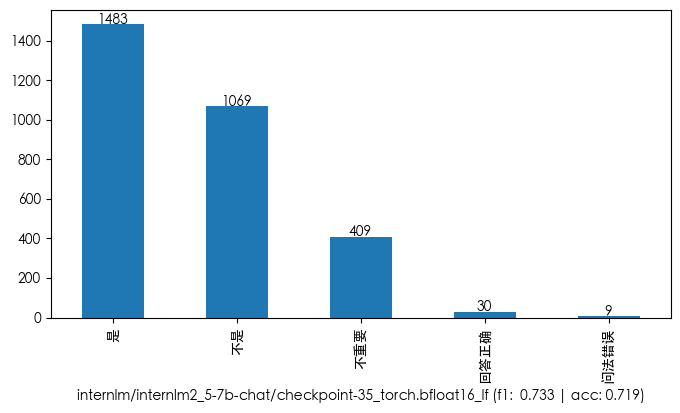

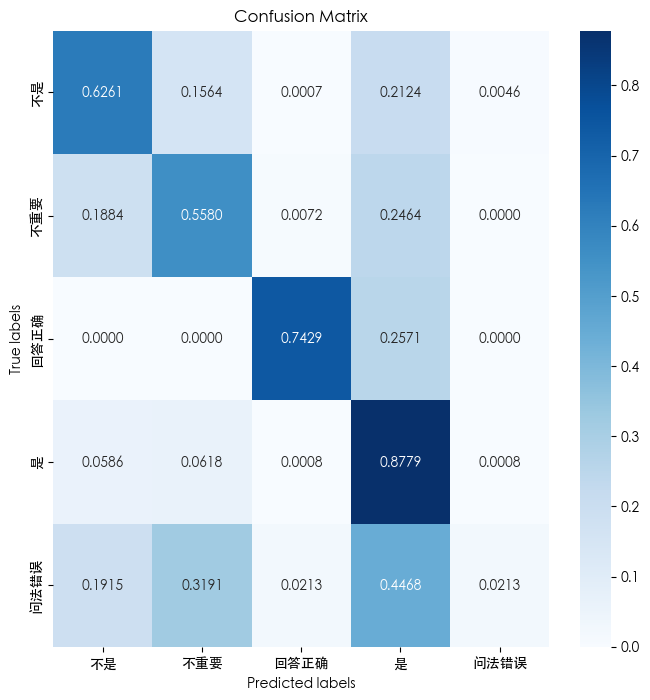

********** internlm/internlm2_5-7b-chat/checkpoint-70_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-70_torch.bfloat16_lf
是       1458
不是      1108
不重要      404
回答正确      22
问法错误       8
Name: count, dtype: int64


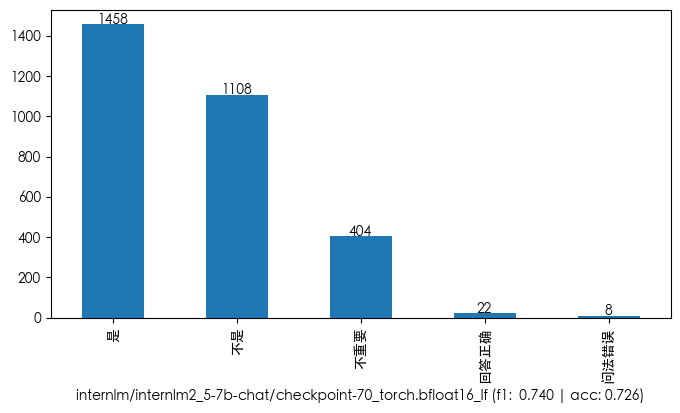

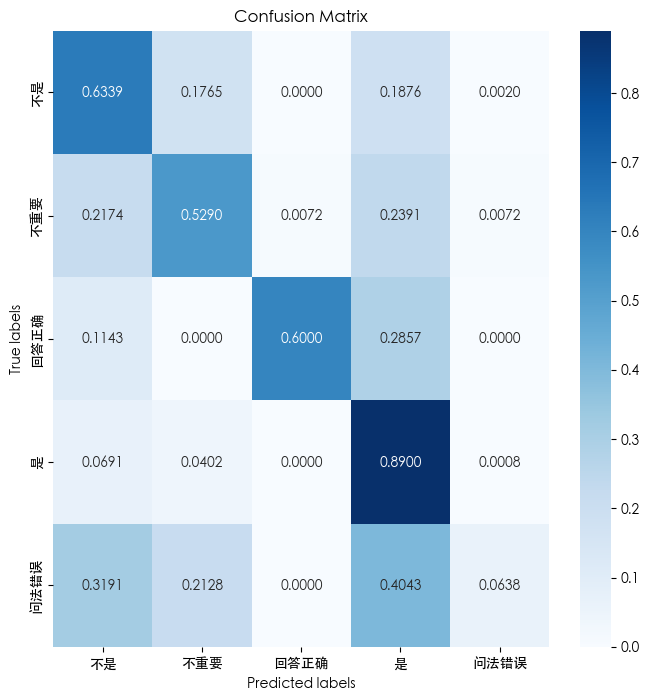

********** internlm/internlm2_5-7b-chat/checkpoint-105_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-105_torch.bfloat16_lf
是       1297
不是       974
不重要      694
回答正确      29
问法错误       6
Name: count, dtype: int64


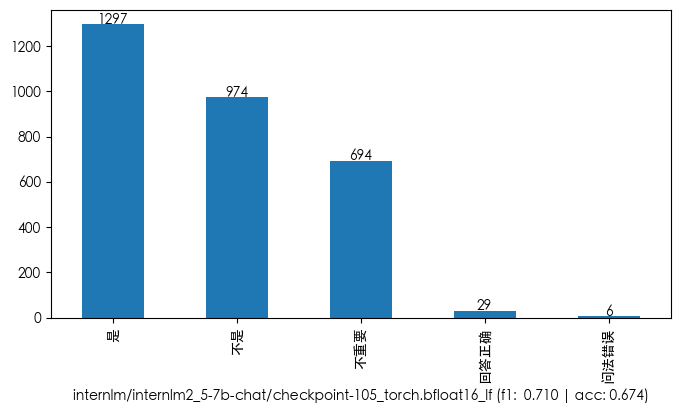

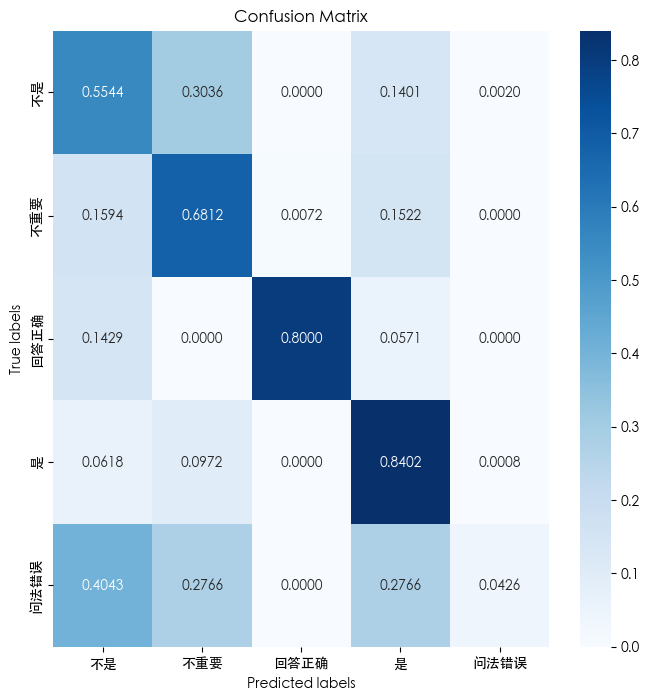

********** internlm/internlm2_5-7b-chat/checkpoint-140_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-140_torch.bfloat16_lf
是       1371
不是      1182
不重要      333
问法错误      81
回答正确      33
Name: count, dtype: int64


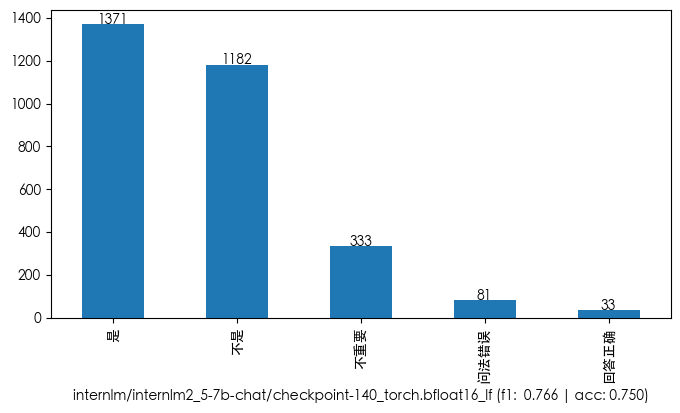

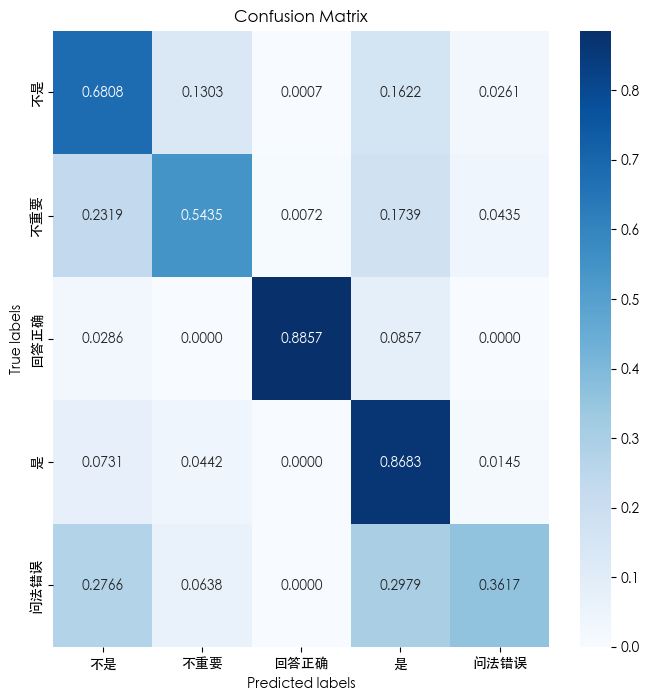

********** internlm/internlm2_5-7b-chat/checkpoint-175_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-175_torch.bfloat16_lf
是       1325
不是      1110
不重要      486
问法错误      47
回答正确      32
Name: count, dtype: int64


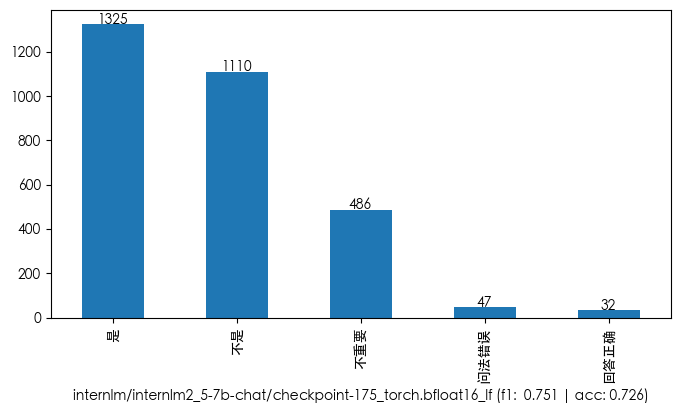

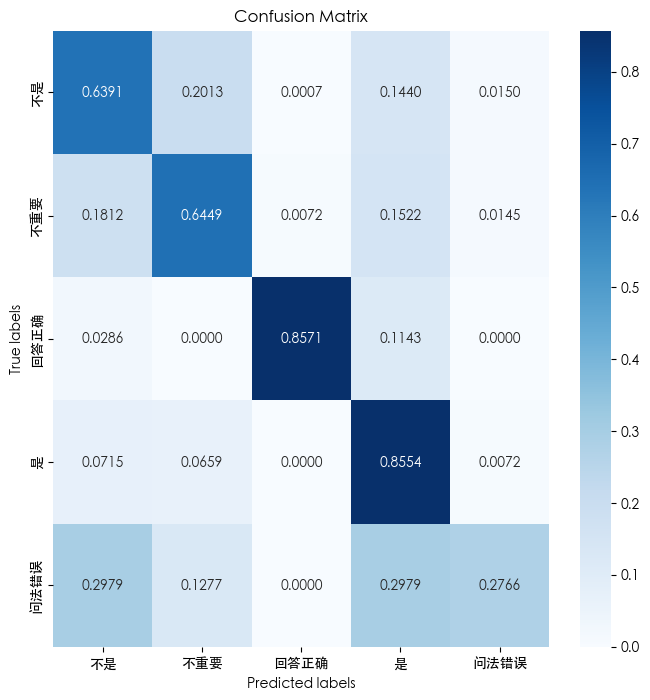

********** internlm/internlm2_5-7b-chat/checkpoint-210_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-210_torch.bfloat16_lf
是       1394
不是      1089
不重要      416
问法错误      70
回答正确      31
Name: count, dtype: int64


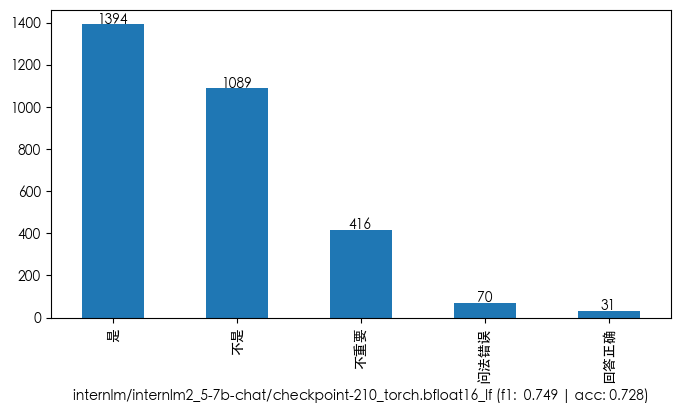

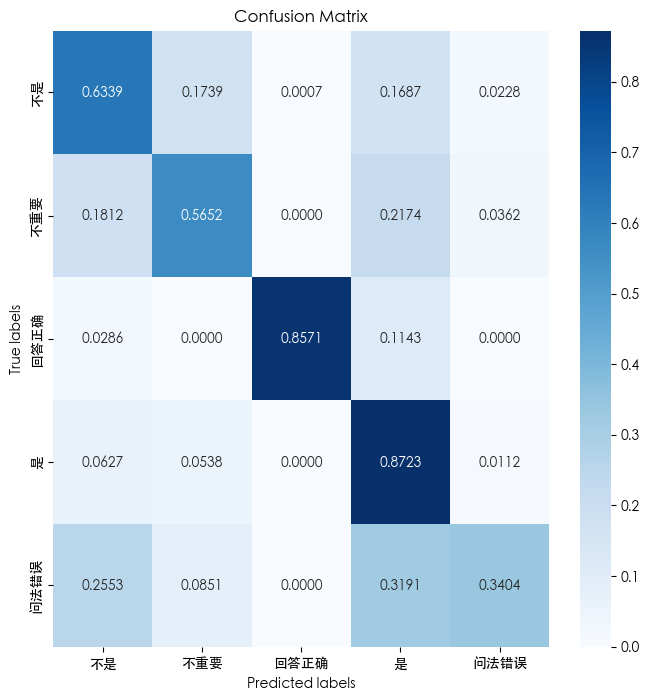

********** internlm/internlm2_5-7b-chat/checkpoint-245_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-245_torch.bfloat16_lf
是       1344
不是      1196
不重要      381
问法错误      55
回答正确      24
Name: count, dtype: int64


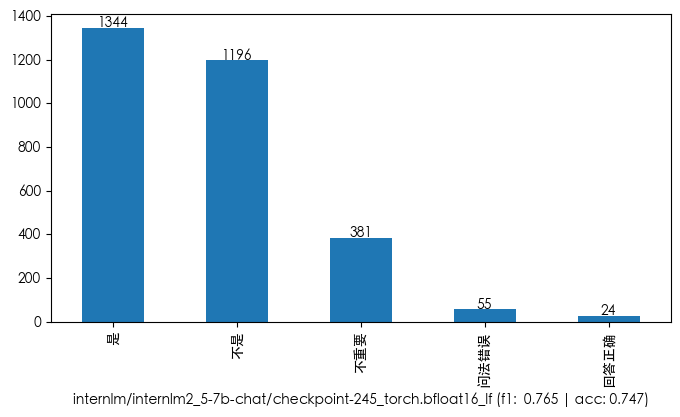

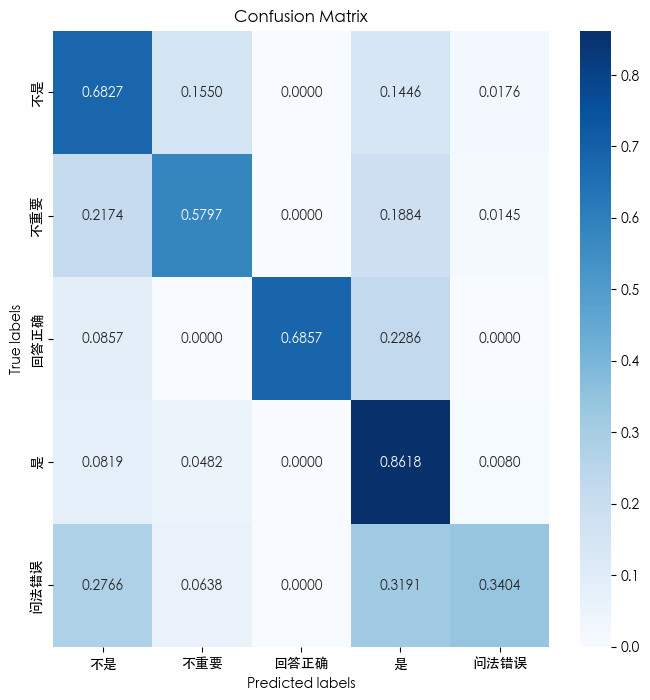

********** internlm/internlm2_5-7b-chat/checkpoint-280_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-280_torch.bfloat16_lf
是       1341
不是      1081
不重要      491
问法错误      61
回答正确      26
Name: count, dtype: int64


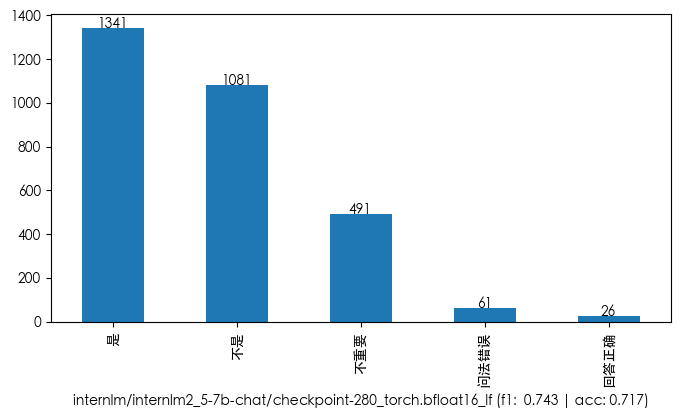

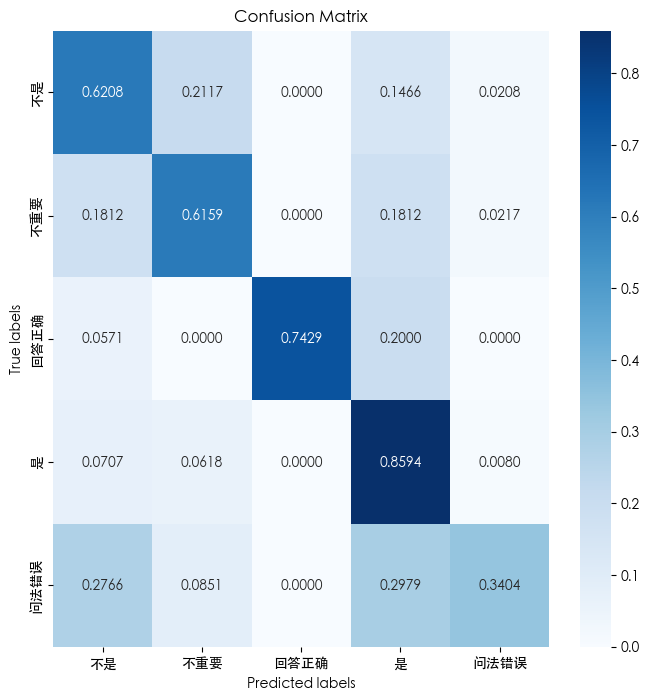

********** internlm/internlm2_5-7b-chat/checkpoint-315_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-315_torch.bfloat16_lf
是       1263
不是      1057
不重要      604
问法错误      49
回答正确      27
Name: count, dtype: int64


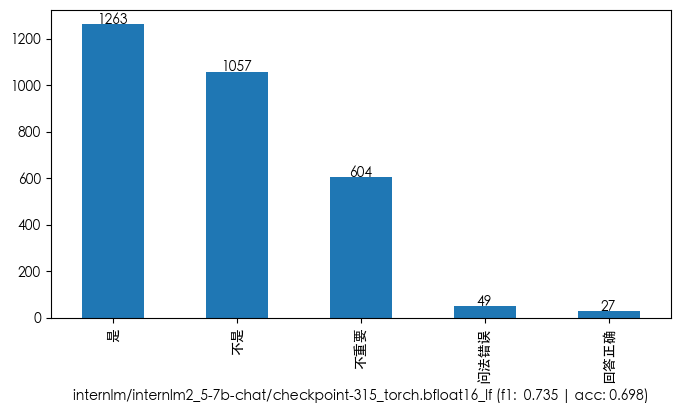

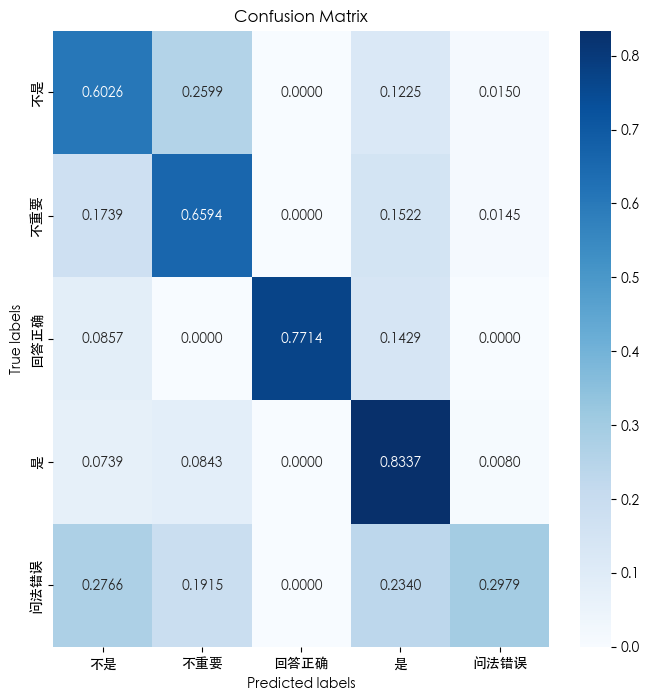

********** internlm/internlm2_5-7b-chat/checkpoint-350_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat/checkpoint-350_torch.bfloat16_lf
是       1282
不是      1075
不重要      569
问法错误      47
回答正确      27
Name: count, dtype: int64


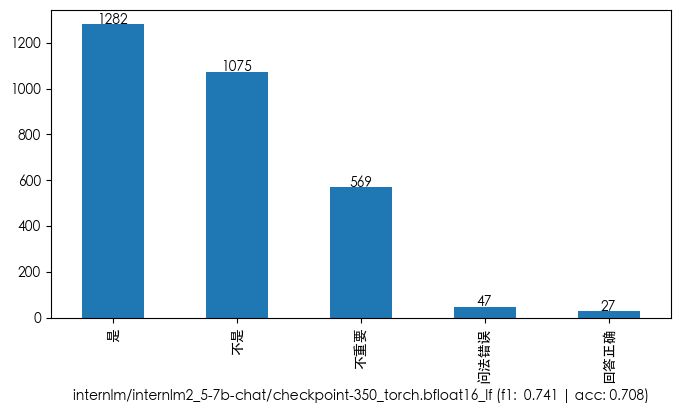

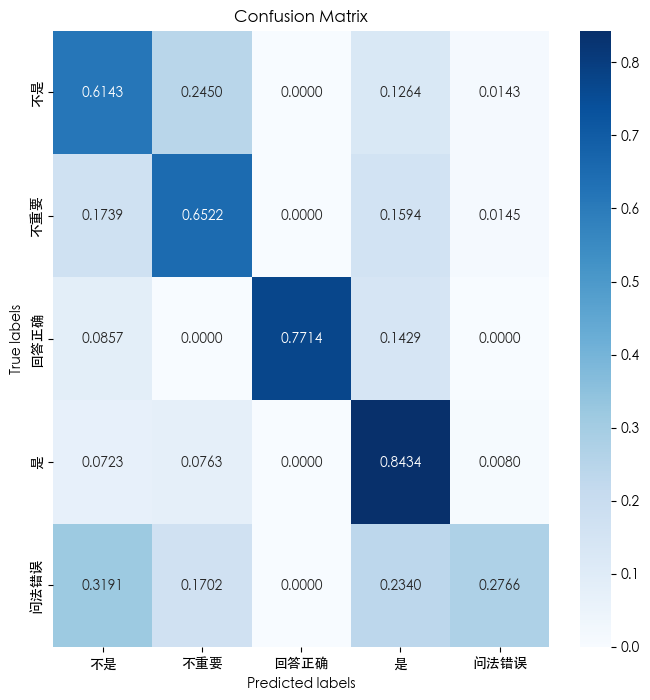

In [13]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )